# Plotting Strange Attractors 

**By Henry Hong and Yi Shen**

In [2]:
#Importing packages for numbers and plotting
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import PillowWriter
import scipy 
import matplotlib.animation as manimation
from IPython.display import display,HTML,IFrame
from IPython.display import Video 
import ipympl
%matplotlib widget


plt.rcParams['animation.ffmpeg_path'] = "/Users/henryhong/Downloads/ffmpeg"

Lorenz Attractor

In [1]:
# fig = plt.figure()
x,y,z=[0],[1],[0]

P = 10 #Prandtl Number
R = 28 #Difference in Temperature
B = 8/3 #Ratio of Width vs Height
n = 10000

dt = 0.01

def Lorenz(x,y,z): #Using simplification of Navier-Stokes equations, xyz are the previous values
    x_d = (P*(y-x))*dt #change in x
    y_d = (R*x-y-x*z)*dt
    z_d = (x*y-B*z)*dt
    return x_d, y_d, z_d

for i in range (n): #Using Euler's Method
    # x_p = x[i] #previous x value
    # y_p = y[i]
    # z_p = z[i]
    x_p = x[-1] #previous x value
    y_p = y[-1]
    z_p = z[-1]
    x_d, y_d, z_d = Lorenz(x_p,y_p,z_p)
    x.append(x_p+x_d) #Previous value plus change in x, Euler's method
    y.append(y_p+y_d)
    z.append(z_p+z_d)


plt.clf()
print("x-y plane")
plt.plot(x,y)
plt.ylabel('y')
plt.xlabel('x')


plt.clf()
print("x-z plane")
plt.plot(x,z)
plt.ylabel('z')
plt.xlabel('x')


plt.clf()
print("y-z plane")
plt.plot(y,z)
plt.ylabel('z')
plt.xlabel('y')


# plt.clf()
# print("Three dimensions")
# ax = plt.axes(projection='3d')
# ax.plot(x,y,z, lw=0.4)
# ax.set_ylabel('y')
# ax.set_xlabel('x')
# ax.set_zlabel('z')
# plt.show()

print("Two dimensions")
fig, (ax1, ax2, ax3) = plt.subplots(3)

fig.set_figwidth(10)
fig.set_figheight(20)

ax1.plot(x,y);
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.plot(x,z);
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax3.plot(y,z);
ax3.set_xlabel('y')
ax3.set_ylabel('z')


NameError: name 'plt' is not defined

In [ ]:
fig2, (ax4) = plt.subplots(1)
print("Three dimensions")
ax4 = plt.axes(projection='3d')
ax4.plot(x,y,z, lw=0.4)
ax4.set_ylabel('y')
ax4.set_xlabel('x')
ax4.set_zlabel('z')
plt.show()

In [ ]:
# create and display animation for Lorenz attractor
from IPython.display import display,HTML,IFrame
from IPython.display import Video  

#Animation Code

# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Initialize the movie
fig = plt.figure()

# plot the sine wave line
lorenz_plot, = plt.plot(x, z)
red_circle, = plt.plot([], [], 'ro', markersize = 10)
plt.xlabel('x')
plt.ylabel('z')

# Update the frames for the movie
with writer.saving(fig, "Lorenz.mp4", 100):
    for i in range(0, n, 10):
        x0 = x[i]
        z0 = z[i]
        red_circle.set_data(x0, z0)
        writer.grab_frame()

Video("Lorenz.mp4") 

In [ ]:
# Animation function in 3D
def func(num, dataSet, line):
  #Note: there is no .set_date() for 3 dim data...
  line.set_data(dataSet[0:2, :num])
  line.set_3d_properties(dataSet[2, :num])
  return line

# data, taken from prior lorenz

dataSet = np.array([x, y, z])
numDataPoints = len(x)

# generate matplotlib objects
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw = 2, c = 'g')[0]

# axes labels

ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')
ax.set_title('Trajectory of a Lorenz attractor')

# Creating the Animation object
line_ani = manimation.FuncAnimation(fig, func, frames = numDataPoints, fargs = (dataSet,line), interval = 3, blit = False)
line_ani.save(r'lorenz_animation_new.mp4')

print("Video of Lorenz Attractor in Three Dimensions")
Video("lorenz_animation_new.mp4") 

Rössler Attractor

10000
x =  [ 1.          0.99        0.97986    ... -0.13599734 -0.21218123
 -0.28845881]
y =  [1.         1.012      1.023924   ... 7.51057073 7.5242319  7.53715855]
z =  [0.         0.002      0.0039058  ... 0.1078186  0.10352631 0.09940565]
x-y plane


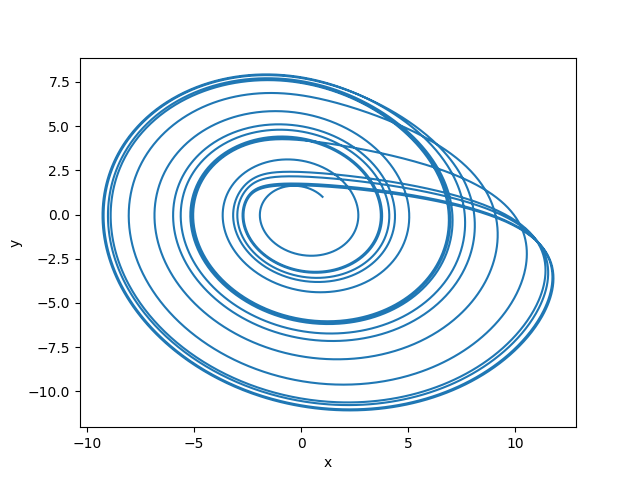

x-z plane


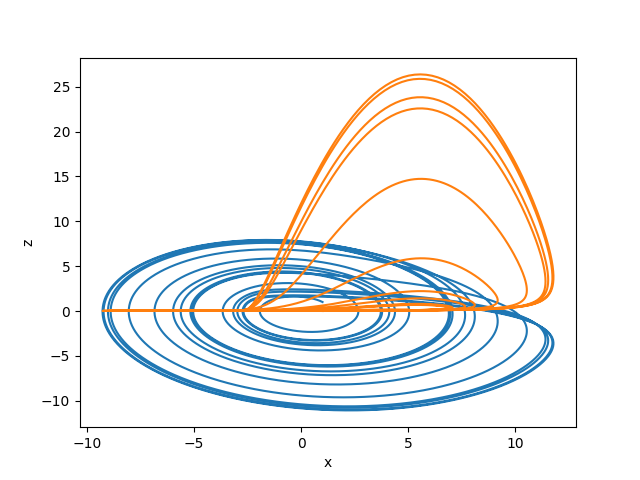

y-z plane


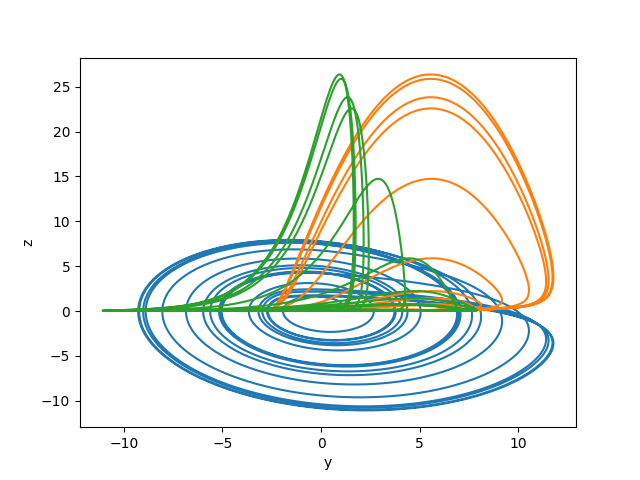

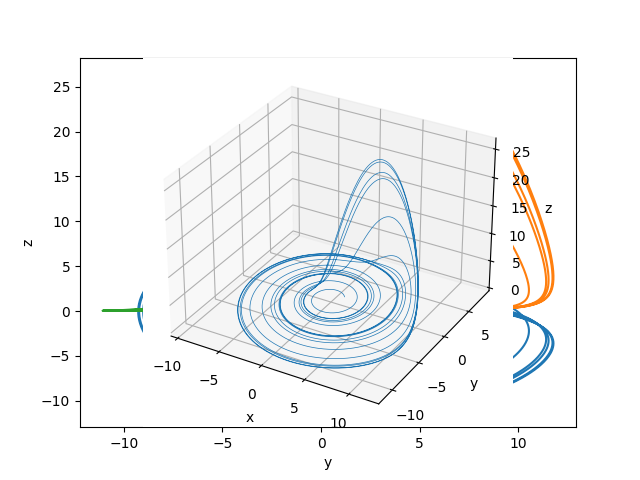

In [17]:
N = 10000
x = np.zeros((N),float)
y = np.zeros((N),float)
z = np.zeros((N),float)

x[0] = 1.0
y[0] = 1.0
z[0] = 0.0

A = 0.2
B = 0.2
C = 5.7

dt = 0.01

# dx/dt = f   ->   (xn-x)/dt = f ->  xn = x + f*dt
def Rossler(x,y,z): #Using simplification of Navier-Stokes equations, xyz are the previous values
    xn = x + (-(y+z))*dt #change in x
    yn = y + (x+A*y)*dt
    zn = z + (B+x*z-C*z)*dt
    return xn, yn, zn

for i in range(N-1): #Using Euler's Method
    #X,Y,Z = Rossler(x[i],y[i],z[i])
    #print(i)
    x[i+1], y[i+1], z[i+1] = Rossler(x[i],y[i],z[i])

print(len(x))
print('x = ',x)
print('y = ',y)
print('z = ',z)
#print(z_p)

plt.clf()

print("x-y plane")
plt.plot(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

print("x-z plane")
plt.plot(x,z)
plt.ylabel('z')
plt.xlabel('x')
plt.show()

print("y-z plane")
plt.plot(y,z)
plt.ylabel('z')
plt.xlabel('y')
plt.show()

ax = plt.axes(projection='3d')
ax.plot(x,y,z, lw=0.5)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('z')
plt.show()

#x1,x2,y1,y2 = plt.axis()  
#plt.axis((x1,x2,0,1))



In [ ]:
#Animation Code for Rossler Attractor

# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='a red circle following a blue sine wave')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Initialize the movie
fig = plt.figure()

# plot the sine wave line
rossler_plot, = plt.plot(x, z)
red_circle, = plt.plot([], [], 'ro', markersize = 10)
plt.xlabel('x')
plt.ylabel('z')

# Update the frames for the movie
with writer.saving(fig, "Rossler.mp4", 100):
    for i in range(0, n, 10):
        x0 = x[i]
        z0 = z[i]
        red_circle.set_data(x0, z0)
        writer.grab_frame()

from IPython.display import Video  
Video("Rossler.mp4")

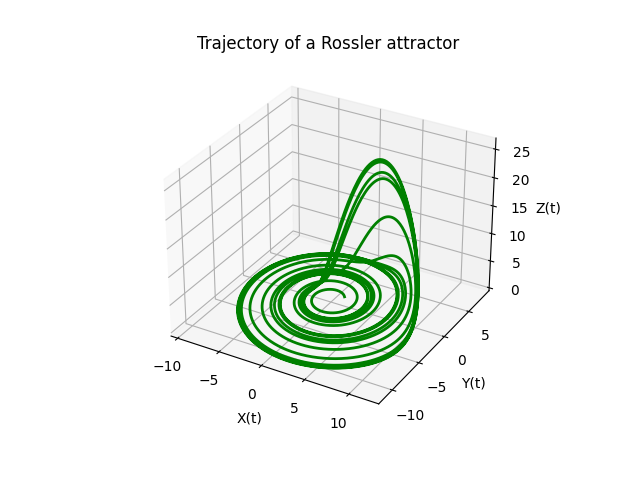

In [18]:
#  Animation of Rossler in 3D
#  Animation function 
def func(num, dataSet, line):
  #Note: there is no .set_date() for 3 dim data...
  line.set_data(dataSet[0:2, :num])
  line.set_3d_properties(dataSet[2, :num])
  return line

# data, taken from prior lorenz

dataSet = np.array([x, y, z])
numDataPoints = len(x)

# generate matplotlib objects
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw = 2, c = 'g')[0]

# axes labels

ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')
ax.set_title('Trajectory of a Rossler attractor')

# Creating the Animation object
line_ani = manimation.FuncAnimation(fig, func, frames = numDataPoints, fargs = (dataSet,line), interval = 2, blit = False)
line_ani.save(r'rossler_animation_new.mp4')

Video("rossler_animation_new.mp4") 


Henon Attractor

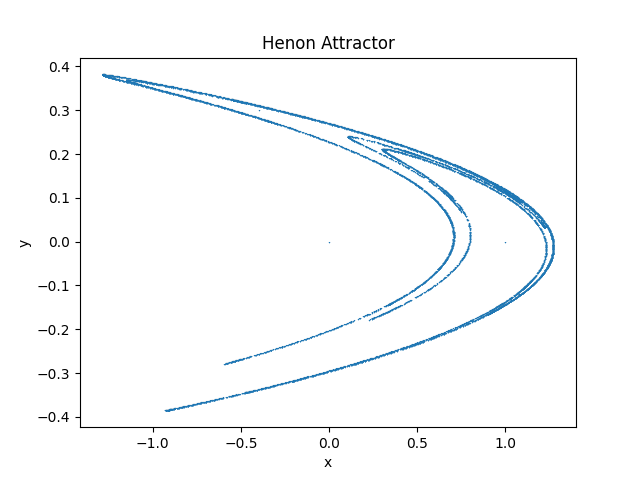

In [2]:
#Plotting the Henon Attractor
fig = plt.figure()
n = 10000 #number of points generated
x = np.zeros((n),float)
y = np.zeros((n),float)

x[0] = 0
y[0] = 0

a = 1.4
b = 0.3

def Henon(x,y): 
    xn = 1.0 - a*x**2 + y
    yn = b*x
    return xn, yn

for i in range(n-1): #Using Recursion
    x[i+1], y[i+1] = Henon(x[i],y[i])

plt.clf()
plt.plot(x, y, '^', markersize=0.3)
# plt.style.use('dark_background')
# plt.plot(x,y,marker='o')
# plt.scatter(x,y,s=1)
plt.xlabel('x');
plt.ylabel('y')
plt.title("Henon Attractor")
#x1,x2,y1,y2 = plt.axis()  
#plt.axis((x1,x2,0,1))
plt.show()


In [ ]:
#Animation Code for Henon Attractor

fig = plt.figure()
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='a red circle following a blue sine wave')
writer = FFMpegWriter(fps=15, metadata=metadata)


# plot
henon_plot, = plt.plot(x, y, '^', markersize=0.3)
red_circle, = plt.plot([], [], 'ro', markersize = 10)
plt.xlabel('x')
plt.ylabel('y')

# Update the frames for the movie
with writer.saving(fig, "Henon.mp4", 100):
    for i in range(0, n, 10):
        x0 = x[i]
        y0 = y[i]
        red_circle.set_data(x0, y0)
        writer.grab_frame()

Video("Henon.mp4")

Comparing Euler's Method to Modified Euler's Method

In [ ]:
#Lorenz
x,y,z=[0],[1],[0]
x1,y1,z1=[0],[1],[0] #Will be compared to regular Euler's

#Filling Euler's method arrays for Plotting
for i in range (n): #Using Euler's Method
    x_p = x[-1] #previous x value
    y_p = y[-1]
    z_p = z[-1]
    x_d, y_d, z_d = Lorenz(x_p,y_p,z_p)
    x.append(x_p+x_d) #Previous value plus change in x, Euler's method
    y.append(y_p+y_d)
    z.append(z_p+z_d)

#Filling Modified Euler's method arrays for Plotting
for i in range (n): #Modified Euler's Method for accuracy comparison
    x_p = x1[-1] #previous x value
    y_p = y1[-1]
    z_p = z1[-1]
    x_d1, y_d1, z_d1 = Lorenz(x_p,y_p,z_p)
    x_n, y_n, z_n = x_p+x_d1,y_p+y_d1,z_p+z_d1
    x_d2, y_d2, z_d2 = Lorenz(x_n,y_n,z_n)
    x1.append(x_p+0.5*(x_d1+x_d2)) #Previous value plus average of changes in x, Modified Euler's method
    y1.append(y_p+0.5*(y_d1+y_d2))
    z1.append(z_p+0.5*(z_d1+z_d2))

fig = plt.figure()
print("Euler's Method Result")
ax = plt.axes(projection='3d')
ax.plot(x,y,z, lw=0.4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

fig = plt.figure()
print("Modified Euler's Method Result")
ax = plt.axes(projection='3d')
ax.plot(x1,y1,z1, lw=0.4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# i=10000 #Use commented code to compare exact values between Euler's and Modified
  
# print("Euler's Method") 
# print("x:",x[i])
# print("y:",y[i])
# print("z:",z[i],"\n")

# print("Modified Euler's Method")
# print("x1:",x1[i])
# print("y1:",y1[i])
# print("z1:",z1[i],"\n")

# print("Difference between methods")
# print ("delta x:",abs(x[i]-x1[i]))
# print ("delta y:",abs(y[i]-y1[i]))
# print ("delta z:",abs(z[i]-z1[i]))

i=np.arange(0,10001) 
x_val=[]
for ind in range(len(x)):
  x_val.append(abs(x[ind]-x1[ind]))

y_val=[]
for ind in range(len(y)):
  y_val.append(abs(y[ind]-y1[ind]))

z_val=[]
for ind in range(len(z)):
  z_val.append(abs(z[ind]-z1[ind]))

print("Difference in Modified Euler's Method values vs. Euler's Method values")

fig = plt.figure()
fig.set_size_inches(20, 5)
plt.xlabel('Index')
plt.ylabel('Difference in x values')
plt.title("Euler's vs. Modified Euler's method: Difference in x values vs. index")
plt.plot(i,x_val,)

fig = plt.figure()
fig.set_size_inches(20, 5)
plt.xlabel('Index')
plt.ylabel('Difference in y values')
plt.title("Difference in y values vs. index")
plt.plot(i,y_val,)

fig = plt.figure()
fig.set_size_inches(20, 5)
plt.xlabel('Index')
plt.ylabel('Difference in z values')
plt.title("Difference in z values vs. index")
plt.plot(i,z_val,)
